In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [48]:
np.random.seed(421)

class_means = np.array([[+0.0, +2.5], 
                        [-2.5, -2.0], 
                        [+2.5, -2.0]])

class_covariances = np.array([[[+3.2, +0.0], 
                               [+0.0, +1.2]],
                              [[+1.2, +0.8], 
                               [+0.8, +1.2]],
                              [[+1.2, -0.8], 
                               [-0.8, +1.2]]])

class_sizes = np.array([120, 80, 100])

In [49]:
points1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0])
points2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[1])
points3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[2])
X = np.vstack((points1, points2, points3))

y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))

In [50]:
np.savetxt("Homework_03.csv", np.hstack((X, y[:, None])), fmt = "%f,%f,%d")

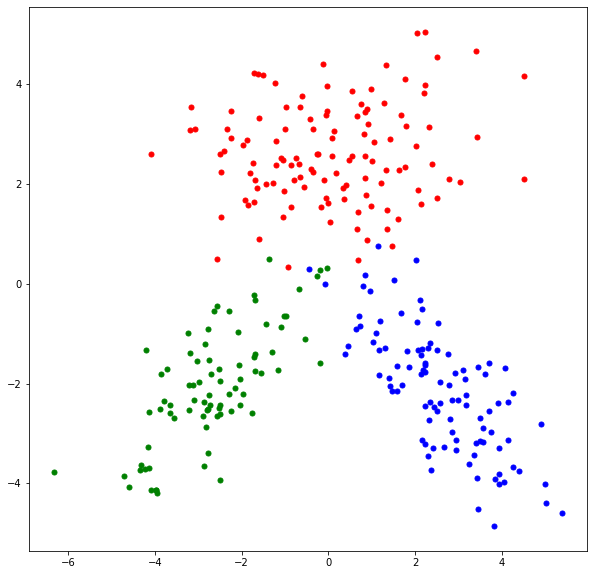

In [51]:
plt.figure(figsize = (10, 10))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 10)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 10)
plt.plot(points3[:,0], points3[:,1], "b.", markersize = 10)

plt.show()

In [52]:
data_set = np.genfromtxt("Homework_03.csv", delimiter = ",")

X = data_set[:,[0, 1]]
y_truth = data_set[:,2].astype(int)

K = np.max(y_truth)
N = data_set.shape[0]


Y_truth = np.zeros((N, K)).astype(int)
Y_truth[range(N), y_truth - 1] = 1

In [53]:
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

In [54]:
def gradient_W(X, Y_truth, Y_predicted):
    return(np.asarray([-np.matmul(Y_truth[:,c] - Y_predicted[:,c], X) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(Y_truth - Y_predicted, axis = 0))

In [55]:
eta = 0.01
epsilon = 0.001

In [56]:
W = np.random.uniform(low = -0.01, high = 0.01, size = (X.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

In [57]:
iteration = 1
objective_values = []

while 1:

    y_predicted = sigmoid(X, W, w0)
    W_old = W
    w0_old = w0
    objective_values = np.append(objective_values, 0.5 * np.sum((Y_truth - y_predicted)**2))
    
    W = W - eta * gradient_W(X, Y_truth, y_predicted)
    w0 = w0 - eta * gradient_w0(Y_truth, y_predicted)
    
    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
      break

    iteration = iteration + 1

print(W)
print(w0)

[[-0.67728123 -2.42009103  2.42893903]
 [ 7.17102179 -2.08967355 -2.28079835]]
[[-3.82994952 -3.15318461 -2.77861457]]


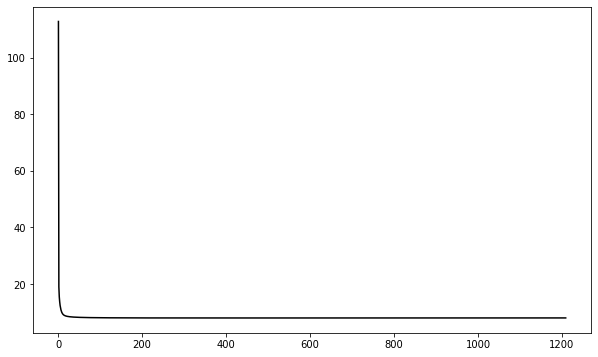

In [58]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.show()

In [59]:
y_predicted = np.argmax(y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth    1   2   3
y_pred              
1        119   4   2
2          1  76   1
3          0   0  97


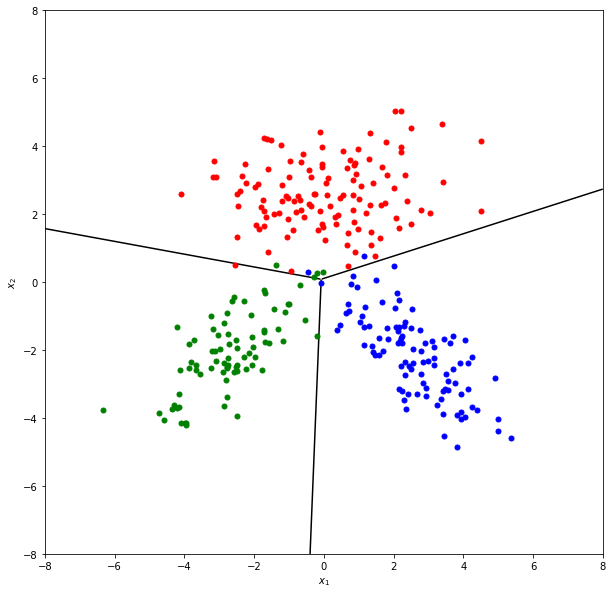

In [64]:
x1_interval = np.linspace(-8, +8, 1201)
x2_interval = np.linspace(-8, +8, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
discriminant_values = np.zeros((len(x1_interval), len(x2_interval), K))
for c in range(K):
    discriminant_values[:,:,c] = W[0, c] * x1_grid + W[1, c] * x2_grid + w0[0, c]

A = discriminant_values[:,:,0]
B = discriminant_values[:,:,1]
C = discriminant_values[:,:,2]
A[(A < B) & (A < C)] = np.nan
B[(B < A) & (B < C)] = np.nan
C[(C < A) & (C < B)] = np.nan
discriminant_values[:,:,0] = A
discriminant_values[:,:,1] = B
discriminant_values[:,:,2] = C

plt.figure(figsize = (10, 10))
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 2, 0], X[y_truth == 2, 1], "g.", markersize = 10)
plt.plot(X[y_truth == 3, 0], X[y_truth == 3, 1], "b.", markersize = 10)
plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,1], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,1] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()